等额本息计算信用卡分期利息

年前，Apple 联合招行 / 建行 / 工行推出了24期免息分析优惠活动，史无前例。之前招行一直有12期免息分期活动，去年新 iPhone 一发布，这个优惠活动也降格为三期免息分期。大概是新 iPhone 销量不行，招行随后又悄然上线了12期免息分期。至于这回的24期免息分期可谓闻所未闻，而且连宇宙第一大行都参与了。
Apple 的分期活动采用的是等额本息方式计算。下面这张图对比了12期分期免息和不免息的月付：招行等三个银行都是免息，所以 1055 * 12 = 12660，Apple 帮你抹掉了最后的两块钱；
而农行是不免息，所以是 1092 * 12 = 13104，刚好是下面所写的 3.5 % 的费率， 这里的费率不等年化利率。所以农行的实际利率要高于3.5%的年化利率。那么农行的实际利率是多少呢？
本息等额的计算公式如下：

$
AP=T*\frac{R*(1+R)^{M}}{(1+R)^{M}-1}
$

T: Total总金额
M: 分期期数（月份）
MR: 月利息
AP:实际付出总金额

我们可以用 Python 来辅助计算：

In [1]:
def month_pay(T, M, MR):
    overall_rate = (1 + MR) ** M
    return T * (MR * overall_rate) / (overall_rate - 1)

In [2]:
def actual_pay(T, M, MR):
    return month_pay(T, M, MR) * M

我们可以依次填入本金总额T=12662，分期M12期，月利率MR = 年化3.5%/12。得出的每供是 1075。总还款额是 12900，比农行的总还款额少了204元。

In [3]:
AP = actual_pay(12662, 12, 0.035/12)

In [4]:
AP

12903.332125027006

倒推实际利率并不好推导，不过借助上面的函数，我们可以算出农行的实际年化利率大约是7%。如果按照上面的年化利率 7% 计算，我们分期24期，一共需要还款 13606。

In [5]:
def saving(T, M, MR):
    AP = actual_pay(T, M, MR)
    return AP - T

In [6]:
S = saving(12662, 12, 0.035/12)

In [7]:
S

241.33212502700553

In [8]:
def cal_actual(T, M, fee_per_m):
    principal_per_m = T/M
    fee_total = fee_per_m * M
    fee_rate_per_m = fee_per_m/principal_per_m*100
    pay_per_m = principal_per_m + fee_per_m
    print (f"分期金额 = {T:.2f}， 分期={M}月，每月手续费＝　{fee_per_m:.2f}，每月还本金＝　{principal_per_m:.2f}, 每月总还款＝{pay_per_m:.2f}　总手续费＝{fee_total:.2f}, 名义月利率　＝ {fee_rate_per_m:.2f}%　")

    

In [9]:
cal_actual(12703.52, 24, 21.6)

分期金额 = 12703.52， 分期=24月，每月手续费＝　21.60，每月还本金＝　529.31, 每月总还款＝550.91　总手续费＝518.40, 名义月利率　＝ 4.08%　


对于银行推销的信用分期还款，问题是这样的。
还是从本息等额的计算公式出发：

$
AP=T*\frac{R*(1+R)^{M}}{(1+R)^{M}-1}
$

我们知道实际欠款T＝12703.52，知道分期数M=24，每月本金还款＝529.31, 每月手续费＝21.6, 折算年化利率3.87%,那么可以尝试计算：



In [10]:
AP = actual_pay(12703.52, 24, 0.0387/12)
    

In [11]:
S = saving(12703.52, 24, 0.0387/12)

In [12]:
S/24

21.601283376770805

In [13]:
!pip install numpy_financial

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [14]:
# 计算IRR的公式，需要安装专门的　numpy 金融库 !pip install numpy_financial
import numpy_financial as npf
irr = npf.irr([-250000, 100000, 150000, 200000, 250000, 300000])
# profile = npf([10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, -140000])
# print (profile)
# print(pow(profile+1, 12) - 1)


SyntaxError: invalid character '＃' (U+FF03) (36558151.py, line 1)

In [22]:
irr

0.5672303344358534

# 问题描述：招行的信用卡分期还优惠，到底划算不划算？
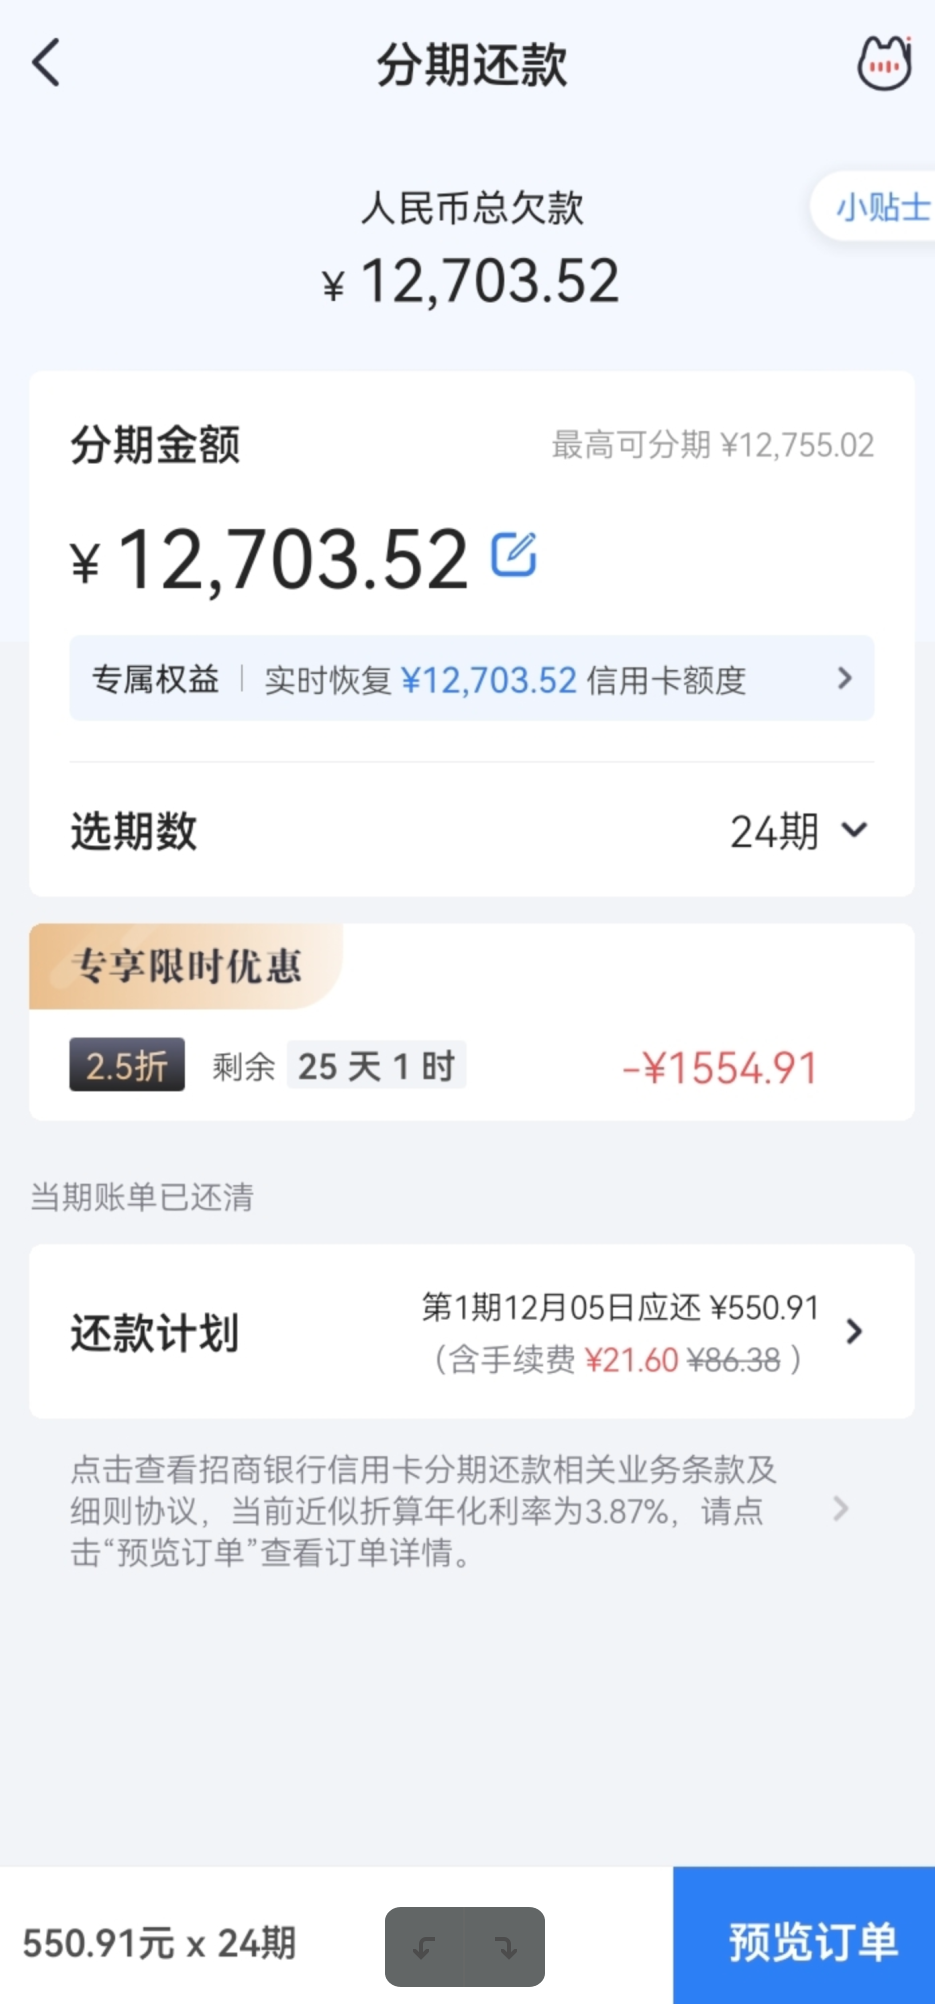


还是从本息等额的计算公式出发：

$
AP=T*\frac{R*(1+R)^{M}}{(1+R)^{M}-1}
$

我们知道实际欠款T＝12703.52，知道分期数M=24，每月本金还款＝529.31, 每月手续费＝21.6, 折算年化利率3.87%,那么可以尝试计算：